In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# **ANALISIS EXPLORATORIO**

Cargamos e inspeccionamos los datos

In [74]:
Ctrl_trillado = pd.read_excel('CC FT 17   Formato de Control de Calidad Café de Trillado (1).xlsx', header = 5)
Formato_tostion = pd.read_excel('CC FT 18  Formato de  Tostión (1).xlsx', header = 5)
Formato_Despachos = pd.read_excel('CC FT 21   Formato de Control de Despachos (1).xlsx', header = 5)

In [75]:
print(Ctrl_trillado.head())
print(Formato_tostion.head())
print(Formato_Despachos.head())

      FECHA     LOTE   DENOMINACIÓN/     MARCA  CANTIDAD    %H Unnamed: 5  \
0       NaN        NaN                     NaN       NaN   NaN        NaN   
1       NaN        NaN                     NaN       NaN     %       C/NC   
2  19-07-22  01-190722            Madre Laura      765.0  10.9         C    
3   19-7-22  09-190722           Tabi Natural      204.0  10.2          C   
4  19-07-22  10-190722              Don Mario      165.0  10.7          C   

  MALLAS Unnamed: 7 VERIFICACIÓN FISICA CAFÉ TOSTADO   \
0    NaN        NaN                               NaN   
1      #       C/NC                              C/NC   
2     14         C                                  C   
3     14          C                                 C   
4     14          C                                 C   

                                   NOTAS DE CATACIÓN PUNTAJE Unnamed: 11  \
0                                                NaN     NaN         NaN   
1                                         

In [76]:
print('columnas de las tablas: ')
print(Ctrl_trillado.columns)
print(Formato_tostion.columns)
print(Formato_Despachos.columns)

columnas de las tablas: 
Index(['FECHA', 'LOTE  ', 'DENOMINACIÓN/     MARCA', 'CANTIDAD', '%H',
       'Unnamed: 5', 'MALLAS', 'Unnamed: 7',
       'VERIFICACIÓN FISICA CAFÉ TOSTADO ', 'NOTAS DE CATACIÓN', 'PUNTAJE',
       'Unnamed: 11', 'LIBERACIÓN DE LOTE', 'RESPONSABLE '],
      dtype='object')
Index(['Fecha ', 'Lote ', 'Origen', 'Variedad', 'Proceso', 'Beneficio ',
       'Peso en Verde', 'Merma ', 'Peso en Tostado ', 'Perfil ',
       'Temp. De inicio y final', 'Tiempo de tueste', 'Observaciones ',
       'Tostador'],
      dtype='object')
Index(['# PEDIDO ', 'FECHA DE TUESTE ', 'FECHA DE EMPAQUE ', 'TIPO DE CAFÉ   ',
       'PRESENTACIÓN ', 'Unnamed: 5', 'CANTIDAD ', 'Unnamed: 7', 'Unnamed: 8',
       'CLIENTE ', 'RESPONSABLE DESPACHO ', 'VERIFICA '],
      dtype='object')


Identificacion y limpieza de columnas importantes

In [77]:
'''emparejo los titulos de las columnas para poder hacer su tratamiento mas comodo'''

Ctrl_trillado.columns = Ctrl_trillado.columns.str.strip().str.lower().str.replace(' ','')
Formato_tostion.columns = Formato_tostion.columns.str.strip().str.lower().str.replace(' ','')
Formato_Despachos.columns = Formato_Despachos.columns.str.strip().str.lower().str.replace(' ','')
print(Ctrl_trillado.columns)
print(Formato_tostion.columns)
print(Formato_Despachos.columns)

Index(['fecha', 'lote', 'denominación/marca', 'cantidad', '%h', 'unnamed:5',
       'mallas', 'unnamed:7', 'verificaciónfisicacafétostado',
       'notasdecatación', 'puntaje', 'unnamed:11', 'liberacióndelote',
       'responsable'],
      dtype='object')
Index(['fecha', 'lote', 'origen', 'variedad', 'proceso', 'beneficio',
       'pesoenverde', 'merma', 'pesoentostado', 'perfil',
       'temp.deinicioyfinal', 'tiempodetueste', 'observaciones', 'tostador'],
      dtype='object')
Index(['#pedido', 'fechadetueste', 'fechadeempaque', 'tipodecafé',
       'presentación', 'unnamed:5', 'cantidad', 'unnamed:7', 'unnamed:8',
       'cliente', 'responsabledespacho', 'verifica'],
      dtype='object')


In [78]:
print(Ctrl_trillado.info())
print(Formato_tostion.info())
print(Formato_Despachos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fecha                          80 non-null     object 
 1   lote                           76 non-null     object 
 2   denominación/marca             76 non-null     object 
 3   cantidad                       76 non-null     float64
 4   %h                             77 non-null     object 
 5   unnamed:5                      78 non-null     object 
 6   mallas                         77 non-null     object 
 7   unnamed:7                      77 non-null     object 
 8   verificaciónfisicacafétostado  77 non-null     object 
 9   notasdecatación                76 non-null     object 
 10  puntaje                        76 non-null     object 
 11  unnamed:11                     77 non-null     object 
 12  liberacióndelote               77 non-null     objec

In [79]:
print(Ctrl_trillado.head())
print(Formato_tostion.head())
print(Formato_Despachos.head())

      fecha       lote denominación/marca  cantidad    %h unnamed:5 mallas  \
0       NaN        NaN                NaN       NaN   NaN       NaN    NaN   
1       NaN        NaN                NaN       NaN     %      C/NC      #   
2  19-07-22  01-190722       Madre Laura      765.0  10.9        C      14   
3   19-7-22  09-190722      Tabi Natural      204.0  10.2         C     14   
4  19-07-22  10-190722         Don Mario      165.0  10.7         C     14   

  unnamed:7 verificaciónfisicacafétostado  \
0       NaN                           NaN   
1      C/NC                          C/NC   
2        C                              C   
3         C                             C   
4         C                             C   

                                     notasdecatación puntaje unnamed:11  \
0                                                NaN     NaN        NaN   
1                                                NaN      N°       C/NC   
2  Chocolate negro, toque frutal, c

In [80]:
'''uso de merge para trabajar con una sola tabla'''

df_final = pd.merge(Ctrl_trillado, Formato_tostion, how='outer', on='lote')
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fecha_x                        446 non-null    object 
 1   lote                           560 non-null    object 
 2   denominación/marca             442 non-null    object 
 3   cantidad                       442 non-null    float64
 4   %h                             443 non-null    object 
 5   unnamed:5                      444 non-null    object 
 6   mallas                         443 non-null    object 
 7   unnamed:7                      443 non-null    object 
 8   verificaciónfisicacafétostado  443 non-null    object 
 9   notasdecatación                442 non-null    object 
 10  puntaje                        436 non-null    object 
 11  unnamed:11                     443 non-null    object 
 12  liberacióndelote               443 non-null    obj

In [81]:
df_final = df_final[['%h','mallas','variedad','proceso','beneficio','pesoenverde','pesoentostado','merma','perfil','temp.deinicioyfinal','tiempodetueste']]
print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %h                   443 non-null    object 
 1   mallas               443 non-null    object 
 2   variedad             524 non-null    object 
 3   proceso              524 non-null    object 
 4   beneficio            524 non-null    object 
 5   pesoenverde          524 non-null    float64
 6   pesoentostado        524 non-null    float64
 7   merma                524 non-null    float64
 8   perfil               524 non-null    object 
 9   temp.deinicioyfinal  524 non-null    object 
 10  tiempodetueste       524 non-null    object 
dtypes: float64(3), object(8)
memory usage: 49.9+ KB
None
     %h mallas  variedad      proceso beneficio  pesoenverde  pesoentostado  \
0  11.2     14  Dos mil   Tradicional   Lavado         200.0          167.5   
1  11.2     14  Dos mil   Tra

In [82]:
for i in df_final:
    print(df_final[i].value_counts())

%h
10.5    69
10.6    69
10.7    66
10.8    63
10.2    46
11.2    44
10.9    38
10.3    34
10.4    13
%        1
Name: count, dtype: int64
mallas
14    439
16      2
15      1
#       1
Name: count, dtype: int64
variedad
Dos mil           309
Gesha              57
Pink Bourbon       30
Wush Wush          27
Tabi               21
Maragogipe         17
Red Bourbon        15
Caturra            12
Bourbon Sidra      12
Castillo            9
Caturron            6
Bourbon Rojo        6
Colombia            2
Caturra             1
Name: count, dtype: int64
proceso
Tradicional     257
Natural         125
Lavado           71
Honey            69
Tradicional       2
Name: count, dtype: int64
beneficio
Lavado          324
Natural         125
Honey            69
Descafeinado      6
Name: count, dtype: int64
pesoenverde
3.0     103
6.0     100
1.2      35
9.0      25
12.0     23
       ... 
7.0       1
10.0      1
3.6       1
3.8       1
5.1       1
Name: count, Length: 98, dtype: int64
pesoentostado

Homogenizacion de los datos

In [83]:
'''asignamos valores numericos a las variables categoricas'''
le = LabelEncoder()
for i in df_final:
    if (i!='%h' and i!='mallas') and (df_final[i].dtypes != 'float64'): #se excluyen %h y mallas porque son numericas y mas adelante se resolvera
        df_final[i] = le.fit_transform(df_final[i])
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %h                   443 non-null    object 
 1   mallas               443 non-null    object 
 2   variedad             579 non-null    int64  
 3   proceso              579 non-null    int64  
 4   beneficio            579 non-null    int64  
 5   pesoenverde          524 non-null    float64
 6   pesoentostado        524 non-null    float64
 7   merma                524 non-null    float64
 8   perfil               579 non-null    int64  
 9   temp.deinicioyfinal  579 non-null    int64  
 10  tiempodetueste       579 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 49.9+ KB
None


In [84]:
df_final = df_final.apply(lambda  col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)

In [85]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %h                   442 non-null    float64
 1   mallas               442 non-null    float64
 2   variedad             579 non-null    int64  
 3   proceso              579 non-null    int64  
 4   beneficio            579 non-null    int64  
 5   pesoenverde          524 non-null    float64
 6   pesoentostado        524 non-null    float64
 7   merma                524 non-null    float64
 8   perfil               579 non-null    int64  
 9   temp.deinicioyfinal  579 non-null    int64  
 10  tiempodetueste       579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 49.9 KB
None


# **Definición de variables y preprocesamiento**

se escoje la variable objetivo y las variables de enrtada

In [89]:
VariableObjetivoY = Ctrl_trillado[['puntaje']]
VariableEntradaX = df_final[0:95]

In [92]:
print(VariableObjetivoY.info())
print(VariableEntradaX.info())
print(VariableEntradaX.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   puntaje  76 non-null     object
dtypes: object(1)
memory usage: 892.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %h                   95 non-null     float64
 1   mallas               95 non-null     float64
 2   variedad             95 non-null     int64  
 3   proceso              95 non-null     int64  
 4   beneficio            95 non-null     int64  
 5   pesoenverde          95 non-null     float64
 6   pesoentostado        95 non-null     float64
 7   merma                95 non-null     float64
 8   perfil               95 non-null     int64  
 9   temp.deinicioyfinal  95 non-null     int64  
 10  tiempodetueste       95 non-n

vemos que hay una incongruencia con la cantidad de valores, asi que para reemplazar los NaN usaremos la Media

In [96]:
for i in VariableEntradaX.columns:
    VariableEntradaX.loc[:,i] = VariableEntradaX[i].fillna(df_final[i].mean())#loc para acceder a las comulnas

In [97]:
print(VariableObjetivoY.info())
print(VariableEntradaX.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   puntaje  76 non-null     object
dtypes: object(1)
memory usage: 892.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   %h                   95 non-null     float64
 1   mallas               95 non-null     float64
 2   variedad             95 non-null     int64  
 3   proceso              95 non-null     int64  
 4   beneficio            95 non-null     int64  
 5   pesoenverde          95 non-null     float64
 6   pesoentostado        95 non-null     float64
 7   merma                95 non-null     float64
 8   perfil               95 non-null     int64  
 9   temp.deinicioyfinal  95 non-null     int64  
 10  tiempodetueste       95 non-n

Prosigo con el escalado


In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(VariableEntradaX)
X_scaled = pd.DataFrame(X_scaled, columns=VariableEntradaX.columns)

In [100]:
print(X_scaled.head(20))
print(X_scaled.info())

          %h  mallas  variedad   proceso  beneficio  pesoenverde  \
0   1.053662    -0.5 -0.259645 -0.259645  -0.259645     3.046566   
1   1.053662    -0.5 -0.259645 -0.259645  -0.259645     0.098937   
2   1.053662    -0.5 -0.259645 -0.259645  -0.259645    -1.034767   
3   1.053662    -0.5 -0.259645 -0.259645  -0.259645    -1.024460   
4   1.053662    -0.5 -0.259645 -0.259645  -0.259645    -0.581285   
5   1.053662    -0.5 -0.259645 -0.259645  -0.259645    -1.024460   
6   1.053662    -0.5 -0.259645 -0.259645  -0.259645    -0.766800   
7   1.053662    -0.5 -0.259645 -0.259645  -0.259645     0.655482   
8   1.053662    -0.5 -0.259645 -0.259645  -0.259645     0.655482   
9   1.053662    -0.5 -0.259645 -0.259645  -0.259645    -0.457609   
10  1.053662    -0.5 -0.259645 -0.259645  -0.259645    -0.643124   
11  1.053662    -0.5 -0.259645 -0.259645  -0.259645    -0.985296   
12  1.053662    -0.5 -0.259645 -0.259645  -0.259645     2.180829   
13  1.053662    -0.5 -0.259645 -0.259645  -0.259

division de los datos en conjuntos de prueba y entrenamiento


In [104]:
VariableObjetivoY = pd.to_numeric(VariableObjetivoY, errors='coerce')
VariableObjetivoY = VariableObjetivoY.fillna(VariableObjetivoY.mean())
print(VariableObjetivoY.info())

<class 'pandas.core.series.Series'>
RangeIndex: 95 entries, 0 to 94
Series name: puntaje
Non-Null Count  Dtype  
--------------  -----  
95 non-null     float64
dtypes: float64(1)
memory usage: 892.0 bytes
None


In [120]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, VariableObjetivoY, test_size=0.3, random_state=42)

# **ENTRENAMIENTO DE MODELOS DE REGRESION**

In [121]:
pd.DataFrame(x_train).to_csv('X_train.csv', index=False)
pd.DataFrame(x_test).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('Y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('Y_test.csv', index=False)

Modelo # y Modelo #2


In [122]:
xTrain = pd.read_csv('X_train.csv').values
xTest = pd.read_csv('X_test.csv').values
yTrain = pd.read_csv('Y_train.csv').values
yTest = pd.read_csv('Y_test.csv').values

In [123]:
Modelo_lr = LinearRegression()
#modelo_rf = RandomForestRegressor(random_state=42)

In [124]:
Modelo_lr.fit(xTrain, yTrain)
#modelo_rf.fit(x_train, y_train)

LinearRegression()

Evaluacion de los modelos

In [125]:
from sklearn.metrics import mean_absolute_error
y_prediccion = Modelo_lr.predict(xTest)
r2 = r2_score(yTest, y_prediccion)
rmse = mean_squared_error(yTest, y_prediccion)
error_abs = mean_absolute_error(yTest, y_prediccion)
print(f'R2 Score: {r2} | RMSE: {rmse} | Absolute Error: {error_abs}')


R2 Score: -0.2925631501449095 | RMSE: 1.877349323718455 | Absolute Error: 1.0683440785132872


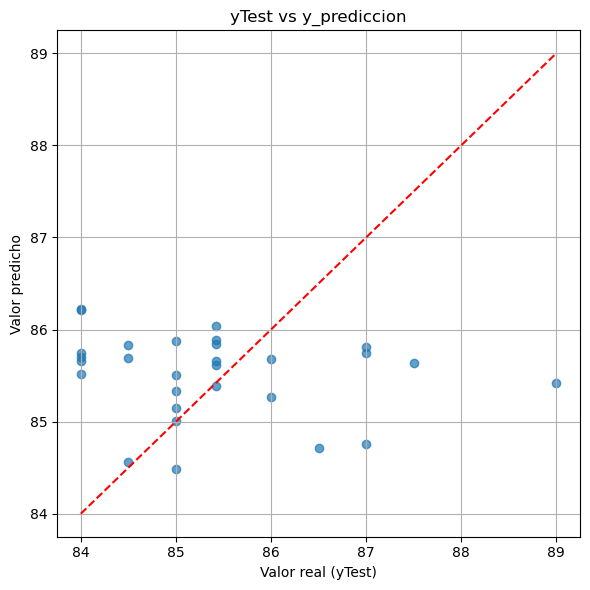

In [112]:
plt.figure(figsize=(6, 6))
plt.scatter(yTest, y_prediccion, alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--')  # línea ideal
plt.title('yTest vs y_prediccion')
plt.xlabel('Valor real (yTest)')
plt.ylabel('Valor predicho')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#modelos = [('Regresion lineal',Modelo_lr),('Random Forest',modelo_rf)]
'''
for name, model in modelos:
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} -> RMSE: {rmse:.2f} | R2: {r2:.2f}')'''



In [ ]:

importances = modelo_rf.feature_importances_
plt.barh(x_train.columns, importances)
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()